## Types of single-nucleotide polymorphism 

In a population of chromosomes, a variety of alleles may be segregating at any given site. 
For example, the reference allele may be "C", 
but some chromosomes may harbor "A" as an ALT allele, and yet others may harbor "T" as a second ALT allele. 

There are eight possible categories to which a given site may belong (considering only single-nucleotide alleles):
one representing the case that a site is monomorphic (no ALT allele);
three representing the case where one ALT allele is segregating (there are three possible ALT alleles for each REF allele),
three representing the case where two ALT alleles are segregating (there are three possible ways to pair each of the three possible ALT alleles), 
one representing the case where all three possible ALT alleles are found in the population. 

A concrete description of these scenarios is presented in the following table, 
which corresponds to a REF allele of "C": 

$$ 
\begin{array}{ccccc}
A & G & T & \#ALTs & probs \\ 
\hline 
  &   &   & 0 & p_{C \rightarrow C} \\
* &   &   & 1 & p_{C \rightarrow A} \\
  & * &   & 1 & p_{C \rightarrow G} \\
  &   & * & 1 & p_{C \rightarrow T} \\
* & * &   & 2 & p_{C \rightarrow \{A,G\}} \\
* &   & * & 2 & p_{C \rightarrow \{A,T\}} \\
  & * & * & 2 & p_{C \rightarrow \{G,T\}} \\
* & * & * & 3 & p_{C \rightarrow \{A,G,T\}} \\
\end{array} 
$$

Though 2-ALT probabilities, e.g., $p_{C \rightarrow \{G,T\}}$, may depend upon single-ALT probabilities, e.g., $p_{C \rightarrow G}$ and $p_{C \rightarrow T}$, we make no attempt to model the dependence, in part because there are so many ways in which multiple ALT alleles could end up segregating at a site. (For example, if C, G and T alleles are segregating, then did the C allele mutate to the G allele, which then subsequently mutated to the T allele, or did the G and T alleles each arise by mutation of C?) Instead we simply estimate the probability of observing multiple ALT alleles segregating at a site. 

We estimate the probability $p_{C \rightarrow \{G,T\}}$, say, by
the fraction of sites that harbor the C allele in the reference genome, 
and segregate the C, G and T alleles in the cohort under consideration. 
Later we will use our estimates of all eight probabilites to predict the SNV count (number of ALT alleles) segregating in a genomic interval.



## Sequence-dependent polymorphism

It is now well-established that the probabilities mentioned above depend not only on the identity of the base in the reference genome at the polymorphic site, but also the bases in the reference genome that surround the polymorphic site [Halldorsson et al 2021; Li et al 2021; Feng, Deng, Li 2021; Iulio et al 2018, Aggarwala and Voight 2016; Samocha et al 2014]. To account for this,
we replace, for example, $p_{C \rightarrow \{A, T\}}$ by $p_{s \rightarrow \{A, T\}}$, where $s$ is a kmer whose center nucleotide is "C". 



## A model to predict the number of ALT alleles in a genomic interval



Let $N_i$ be a Categorical Random Variable representing the number of distinct ALT alleles at the site (genomic position) $i$, with local sequence context $s_i$.
If the center nucleodtide of $s_i$ is C, then the allowed values of $N_i$, and their corresponding probabilities are: 

$$ 
N_i = 
\left\{
\begin{array}{ll}
0 & p_i^{(0)} = p_{s_i \rightarrow C} \\
1 & p_i^{(1)} = p_{s_i \rightarrow A} + p_{s_i \rightarrow G} + p_{s_i \rightarrow T} \\
2 & p_i^{(2)} = p_{s_i \rightarrow \{A,G\}} + p_{s_i \rightarrow \{A,T\}} + p_{s_i \rightarrow \{G,T\}} \\ 
3 & p_i^{(3)} = p_{s_i \rightarrow \{A,G,T\}}
\end{array}
\right.
$$ 

In an interval containing $l$ sites, there are $l$ "trials" of an experiment with four possible outcomes (the possible values of $N_i$ at each site). Though the exact probability distribution of the number of occurrences of each outcome aggregated over $l$ trials is known ([Beaulieu 1991](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=76452&tag=1)), 
it is not immediately useful to us, as we are interested in a derived quantity, the number of ALT alleles in the interval:

\begin{equation*}
N = \sum_{i=1}^l N_i.
\end{equation*}

Though it is cumbersome to derive a formula for this distribution (starting from Beaulieu's result), and computationally inefficient to 
simulate the distribution on a genome-wide scale, 
we can make headway with the first two moments of the distribution 
since they are easy to compute. 

First consider the first two moments of $N_i$: 

$$ 
\begin{align*}
\langle N_i \rangle & = 0p_i^{(0)} + 1p_i^{(1)} + 2p_i^{(2)} + 3p_i^{(3)} \\
\langle N_i^2 \rangle & = 0^2p_i^{(0)} + 1^2p_i^{(1)} + 2^2p_i^{(2)} + 3^2p_i^{(3)} \\
\end{align*}
$$ 

From these we may compute the mean of $N$: 

$$ 
\begin{align*}
\langle N \rangle & = \sum_{i=1}^l \langle N_i \rangle 
\end{align*}
$$ 

and the variance of $N$,
assuming that the number of ALT alleles at nearby sites are not correlated with one another: 

$$ 
\begin{align*}
\text{var}(N) & = \sum_{i=1}^l \text{var}(N_i) & \text{(assumes independence)} \\
& = \sum_{i=1}^l \left( \langle N_i^2 \rangle - \langle N_i \rangle^2 \right)
\end{align*}
$$ 

Note that $\langle N \rangle$ and $\text{var}(N)$ depend upon the sequence of the interval they correspond to. 


## Detecting anomalous ALT allele counts

When the probabilities $\{ p_{s_i \rightarrow a} \}$ are estimated using putatively neutral sites, the mean and variance 
computed above, representing the number of ALT alleles in a given genomic interval, 
are the expected numbers under the assumption of neutrality, 
conditioned upon the sequence context of the interval 
(which would otherwise confound the analysis). 
Therefore when the test statistic 

$$ 
\overline{N} = \frac{N - \langle N \rangle}{\sqrt{\text{var}(N)}}
$$

is much greater than or much less than one (e.g., $\overline{N} = 2$ would be a "2-$\sigma$ event" ), we reject the null model in favor of positive or negative selection, respectively.

Put another way, by shifting and normalizing $N$ as shown above, we may gauge where $N$ lies on its null distribution, 
without actually computing that distribution, thereby gauging how unexpected the observed value of $N$ is. 



mean: exact = 3.9758966943220084 ; simulated = 3.9974
variance: exact = 5.784943106543296 ; simulated = 5.939593240000001


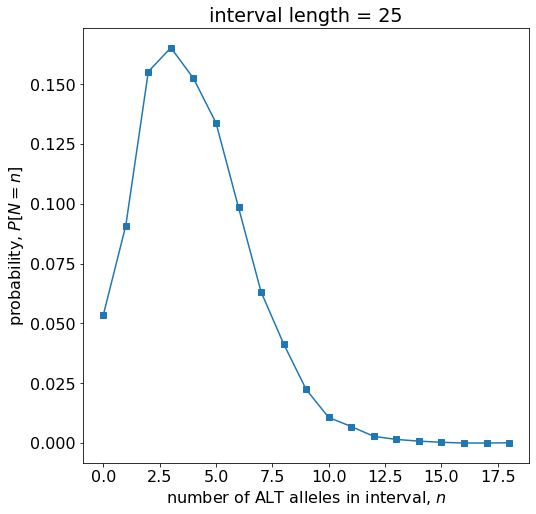

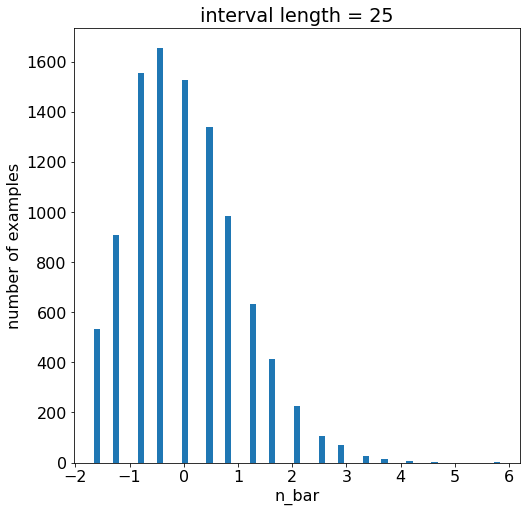

In [40]:
import numpy as np
from collections import Counter
from matplotlib import pyplot as plt 
%matplotlib inline 

def plot_N(number_sites):
  # https://numpy.org/doc/stable/reference/random/generated/numpy.random.dirichlet.html
  p0s_p1s_p2s_p3s = np.random.dirichlet((10, 0.5, 0.5, 0.1), number_sites)

  # compute mean
  mean_Ns = np.array([0*p0 + 1*p1 + 2*p2 + 3*p3 for p0, p1, p2, p3 in p0s_p1s_p2s_p3s])
  mean_N_exact = np.sum(mean_Ns)

  # compute variance
  mean_N2s = np.array([(0**2)*p0 + (1**2)*p1 + (2**2)*p2 + (3**2)*p3 for p0, p1, p2, p3 in p0s_p1s_p2s_p3s])
  variance_N_exact = np.sum(mean_N2s - np.square(mean_Ns))

  N = []
  number_examples = 10000
  for example in range(number_examples):
    Ns = [np.random.choice(a=[0, 1, 2, 3], p=p0_p1_p2_p3) for p0_p1_p2_p3 in p0s_p1s_p2s_p3s]
    N.append(np.sum(Ns))

  print(f'mean: exact = {mean_N_exact} ; simulated = {np.mean(N)}') 
  print(f'variance: exact = {variance_N_exact} ; simulated = {np.var(N)}') 

  N_histogram = Counter(N)    
  max_N = max(N)
  x_N = range(max_N+1)
  probability_of_N = np.array([
      N_histogram[value] 
      if value in N_histogram 
      else 0 
      for value in x_N
  ])/number_examples

  plt.figure(figsize=(8,8))
  plt.rcParams.update({'font.size': 16})    
  plt.plot(x_N, probability_of_N, marker='s')
  plt.title(f'interval length = {number_sites}')
  plt.xlabel(f'number of ALT alleles in interval, $n$')
  _ = plt.ylabel('probability, $P[N=n]$')

  N = np.array(N)
  Nbar = (N - mean_N_exact)/np.sqrt(variance_N_exact)

  plt.figure(figsize=(8,8))
  plt.rcParams.update({'font.size': 16})    
  _ = plt.hist(Nbar, bins='auto')
  plt.title(f'interval length = {number_sites}')
  plt.xlabel(f'n_bar')
  _ = plt.ylabel('number of examples')

plot_N(number_sites=25)

mean: exact = 17.35645178795186 ; simulated = 17.3062
variance: exact = 30.495963910670046 ; simulated = 30.619241560000003


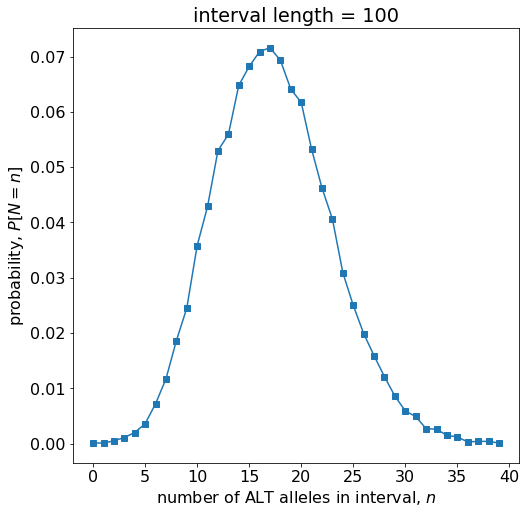

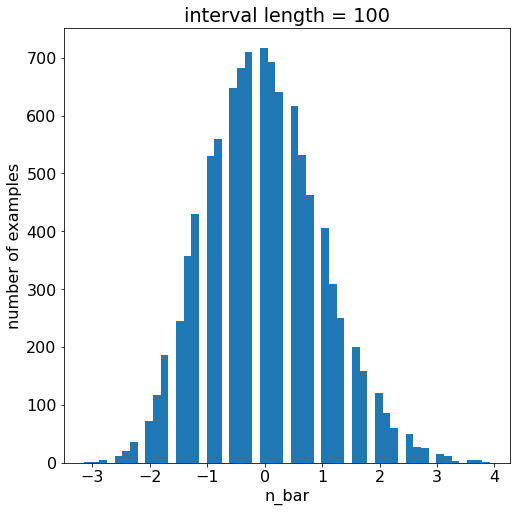

In [41]:
plot_N(number_sites=100)

mean: exact = 34.1819490825782 ; simulated = 34.125
variance: exact = 53.21097412589779 ; simulated = 54.798575


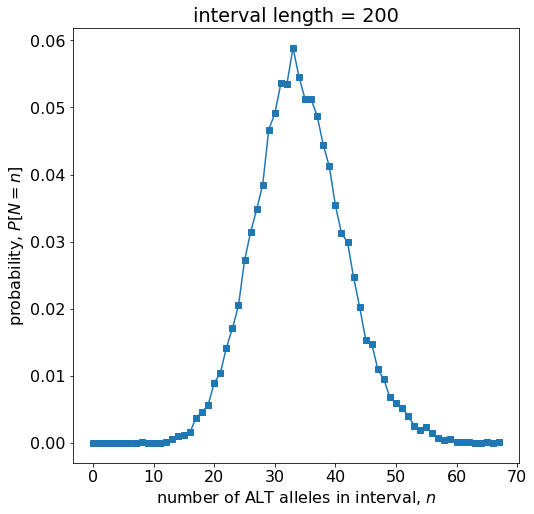

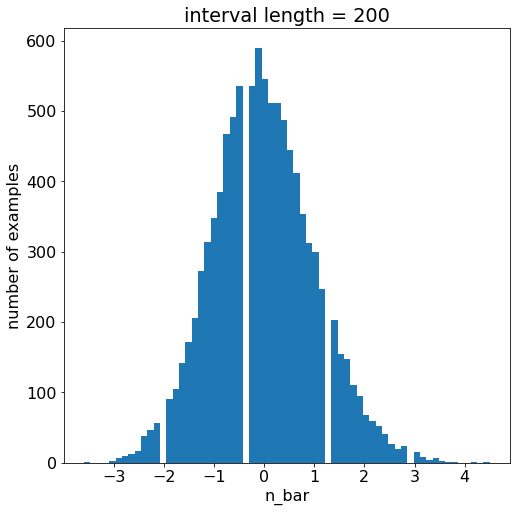

In [48]:
plot_N(number_sites=200)

## Models to predict the number of singleton ALT alleles in a genomic interval

Consider the following data taken from version 3 of the gnomad browser (https://gnomad.broadinstitute.org/) concerning a polymorphic site: 

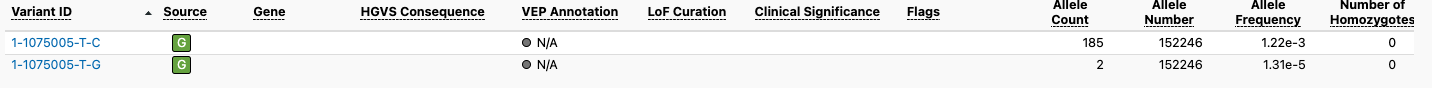

In [36]:
# embed raw image data in notebook: 
# https://github.com/microsoft/vscode-jupyter/issues/6437
from IPython.display import Image
Image(filename='gnomad-allele-frequencies.png', width=2000)

These data tell us that, at site chr1:1,075,005, there are three segregating alleles: T, C and G. Using the notation introduced earlier, this site is classified as $T \rightarrow \{ C, G \}$.

If we imagine "breaking apart" all the genotypes that were confidently called at this site, 
and pooling the resulting 152,246 chromosomes, then 185 of those chromosomes harbor the C allele, and 2 of them harbor the G allele. The remaining chromosomes harbor the T allele. (Note that we cannot know, based upon these data alone, how many of each of the possible diploid genotypes (T/T, T/C, T/G, G/C) exist in the cohort.)

Since natural selection ultimately acts upon alleles, not sites, we may attempt to use ALT allele frequencies to infer natural selection, 
in addition to the model of ALT allele count described in previous sections. For example, when the number of ALT alleles in a 100bp interval, say, is smaller than the number expected given the sequence that appears in those 100bp, one *might* suspect that purifing selection has been acting. If, in addition, the frequencies of the ALT alleles at those sites are smaller, in some sense, than an expectation derived from putatively neutral regions, then one's confidence in rejecting the neutral hypothesis is increased. 



As a first pass at developing expectations regarding allele frequencies, we collect a large sample of putatively neutral intervals of size equal to the size, $l$, of a test interval. (We'll explain later why the training and test intervals must be size-matched.) We then stratify by the number of ALT alleles per interval, $N$, e.g., a stratum may consist of all intervals with $N=3$ ALT alleles. For each stratum, we count the ALT alleles in each interval that are singletons in the population sample (cohort) under consideration. Let's call that singleton count $K$. These empirical distributions (one for each stratum) yield approximations to $\langle K \, | \, N = n , \,l\rangle$ and $\text{var} (K \, | \, N = n , \, l)$. 








## The necessity of conditioning singleton count on ALT-allele count and interval length
<a id='another_cell'></a>

The conditioning of singleton count, $K$, on ALT allele number, $N$, is important as, under a simple population-genetics model, we expect 
$$
K \, | \, N = n \sim \text{Binomial} (n, p)
$$

where $n$ is the number of ALT alleles in the stratum, and $p$ is the probability that a random ALT allele is a singleton under neutrality ([see here](https://docs.google.com/presentation/d/11jOQA2BSNMa10xb5lSksZDqiiyCr8Kgl6cDOCAFSFGA/edit?usp=sharing)). 
Similar dependences of $K$ on $N$ are expected under models that 
don't assume SNVs are independent. 



The restriction to training intervals of length equal to the test-interval length, $l$, is important 
because it accounts for a potentially confounding variable: 
the degree to which the allele frequencies of neighboring SNVs are correlated. 
A concrete example makes the point: 

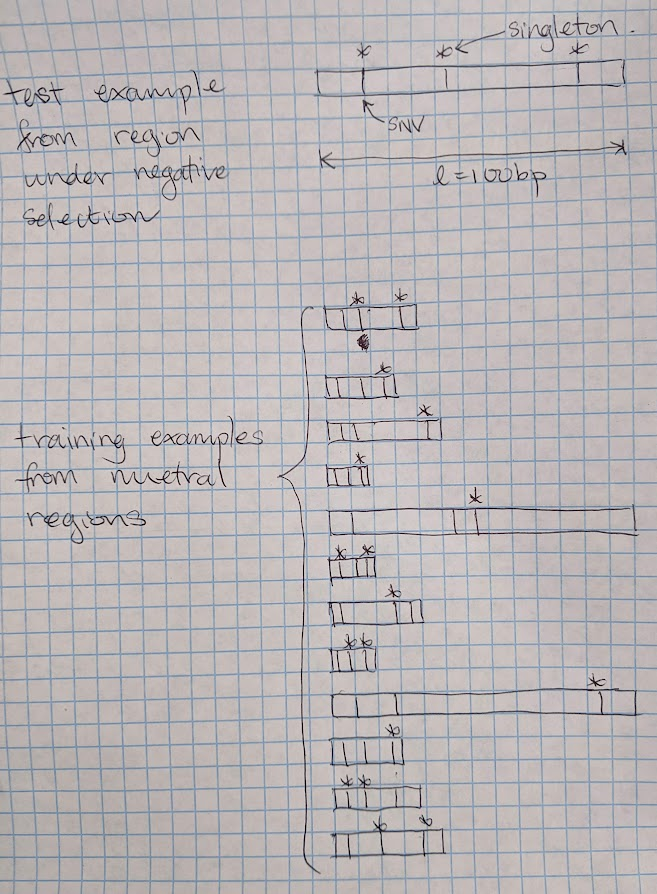

In [12]:
Image(filename='how-to-choose-training-examples-for-singleton-null-model.jpg', width=300)

Since the test interval in this illustration 
is under negative selection, there are fewer ALT alleles than you'd expect for a neutral region of the same size, 
which is supported by the fact that neutral regions that have as few ALT alleles as the test interval 
are generally much shorter than the test interval. 
However, we cannot use the typical neutral interval harboring 3 ALT alleles to form an expectation about 
allele frequencies because SNVs in such intervals are typically much closer to one another 
than the SNVs in the test interval, 
implying that allele-frequencies of neighboring SNVs are more correlated in such intervals 
than they are in the test interval. 
In the illustration, we would account for this confounding variable by 
forming a training set from only the two 100bp neutral intervals (with 3 SNVs). 

The drawback of this strategy is that, in the training phase, we must anticipate the size of the 
intervals that will be used in the test phase. This can be addressed in two ways. 

First, we can generate null models of singleton counts for a handful of interval lengths, 
and then force users to use only those interval lengths.  

Second, we can build ML models that map the tuples $(l, n)$ of interval lengths, $l$, 
and ALT-allele counts, $n$, in neutral regions to $p(k)$, 
the distribution of singleton count, e.g.:


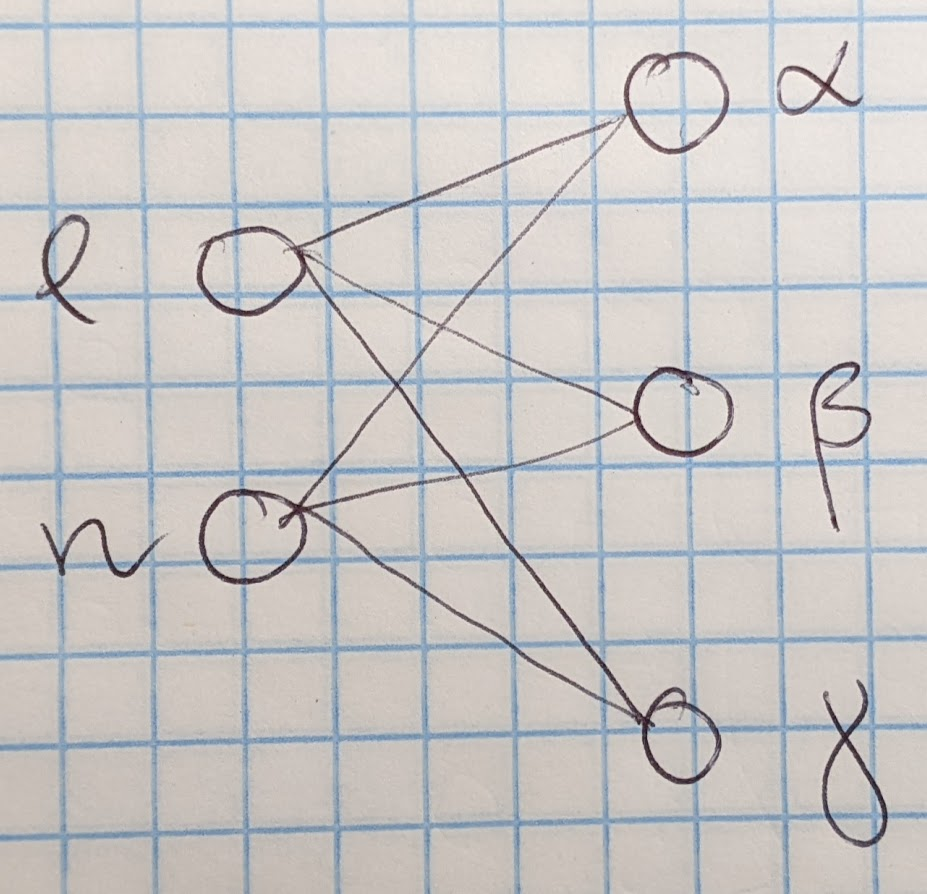

In [10]:
Image(filename='ml-model-of-singleton-number.jpg', width=200)

The advantage of this approach is two fold: we could use all neutral regions, 
regardless of their length, 
*and* we would not need to anticipate 
the size of the interval chosen by the user at test time. 

Since the first approach (restricting the training interval sizes) is the simplest, 
we employed it to develop the prototype of our software tool.

## Detecting anomalous singleton-allele counts

We control for the confounding effects of ALT count $N$ and interval length $l$ on the distribution of singleton count $K$ using a similar approach to how we corrected for the effect of sequence on ALT count: we shift and scale the singleton number: 

$$ 
\overline{K} = \frac{K - \langle K \,|\, N = n, \, l\rangle }{\sqrt{\text{var}(K \, | \, N = n, \, l)}}. 
$$

When $\overline{K}$ is much greater than or much less than one, we reject the null model in favor of positive or negative selection, respectively. 



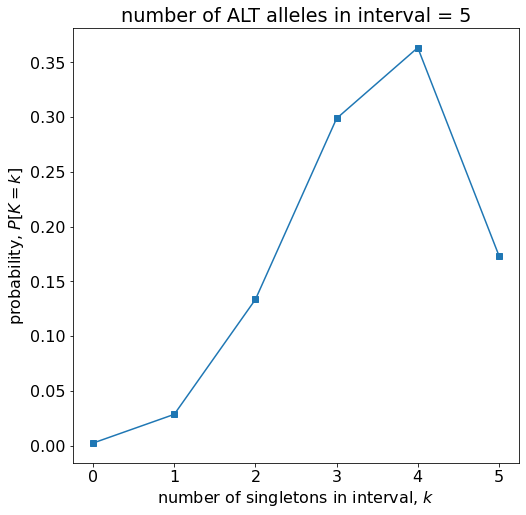

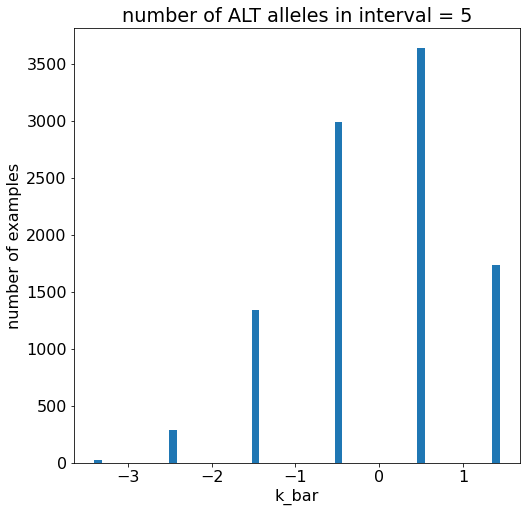

In [43]:
def plot_K(n): # n = number of ALT alleles in interval 
  p = 0.7 # genome-wide singleton fraction 
  number_examples = 10000
  K = np.random.binomial(n, p, number_examples)

  K_histogram = Counter(K)    
  max_K = max(K)
  x_K = range(max_K+1)
  probability_of_K = np.array([
      K_histogram[value] 
      if value in K_histogram 
      else 0 
      for value in x_K
  ])/number_examples

  plt.figure(figsize=(8,8))
  plt.rcParams.update({'font.size': 16})    
  plt.plot(x_K, probability_of_K, marker='s')
  plt.title(f'number of ALT alleles in interval = {n}')
  plt.xlabel(f'number of singletons in interval, $k$')
  _ = plt.ylabel('probability, $P[K=k]$')

  K = np.array(K)
  Kbar = (K - np.mean(K))/np.sqrt(np.var(K))

  plt.figure(figsize=(8,8))
  plt.rcParams.update({'font.size': 16})    
  _ = plt.hist(Kbar, bins='auto')
  plt.title(f'number of ALT alleles in interval = {n}')
  plt.xlabel(f'k_bar')
  _ = plt.ylabel('number of examples')

plot_K(n=5)


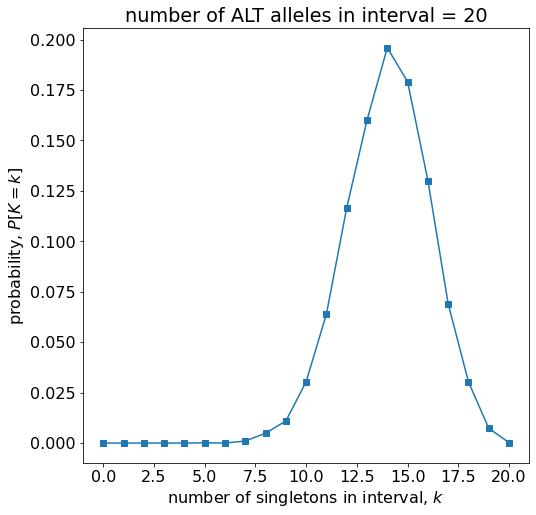

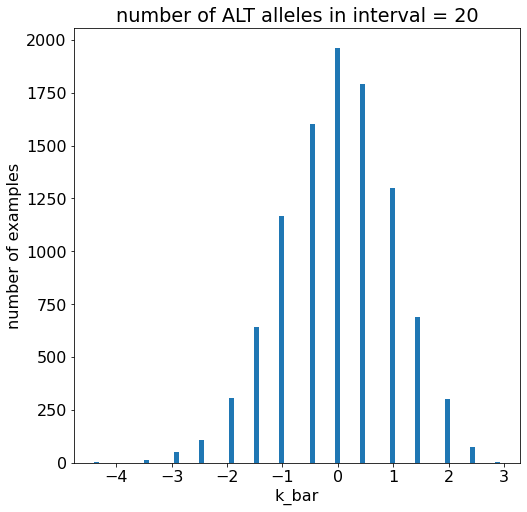

In [44]:
plot_K(n=20)

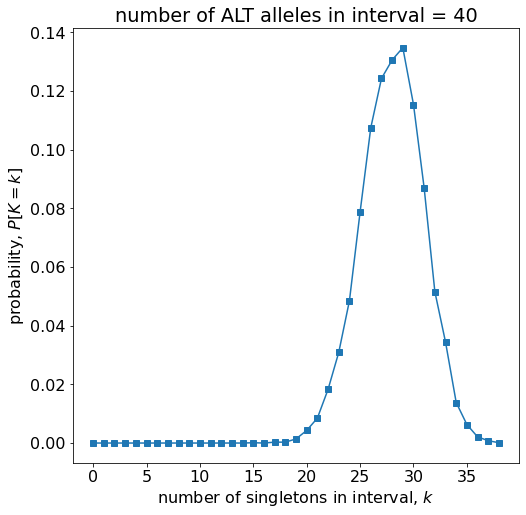

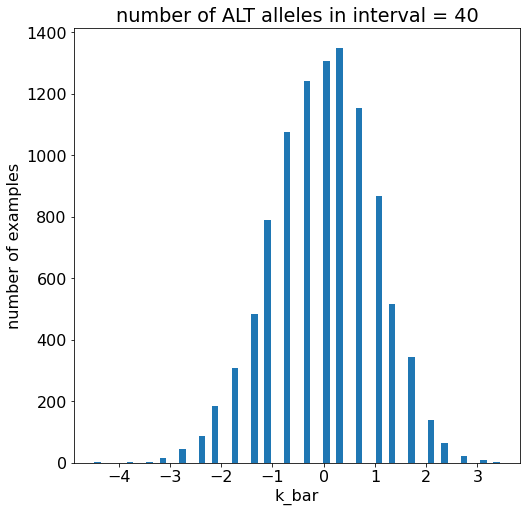

In [47]:
plot_K(n=40)


# Gauging the impact of allele frequency on calling natural selection

To gauge the impact of incorporating allele frequencies into a model that calls constraint, 
we may perform the following two experiments. 

In the first, we equate natural selecction with outliers in $\overline{N}$, and assess performance by producing, e.g., a ROC curve, using a 
positive control dataset. 

In the second, we use *both* $\overline{N}$ *and* $\overline{K}$ to make calls
by producing a two-dimensional scatter plot of these two test statistics
and searching for positive- and negative-selection outliers in the corresponding quadrants of the plot. 
There are countless ways to make calls, e.g., fitting a mixture of three gaussian distributions - 
one for the "inliers", one for the negative-selection "outliers", and one for the positive-selection "outliers". 
An example of this approach can be found [here](https://www.nature.com/articles/s41586-021-04043-8). 





